<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN Practice

---

You're now familiar with how DBSCAN works. Let's practice it in sklearn.

In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import DistanceMetric

from sklearn import cluster
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist, squareform

from sklearn import datasets
from math import radians, cos, sin, asin, sqrt

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## UK postcodes

Now we will do clustering on UK postcodes based on their coordinates. Adjust the parameters of DBSCAN - different values will allow you to see different structures. What would you expect to see?

### 1. Read in the following CSV file containing the outgoing UK postcodes together with their coordinates of longitude and latitude

**Clean the data if necessary!**

In [2]:
X = pd.read_csv(
    'https://www.freemaptools.com/download/outcode-postcodes/postcode-outcodes.csv')

In [3]:
X.drop(X.index[(X.latitude == 0) | (X.longitude == 0)], inplace=True)

### 2. Load the following function. It calculates the distance between any points on the Earth's surface specified by their longitude and latitude in degrees  ([more information]( https://en.wikipedia.org/wiki/Haversine_formula)).

In [4]:
def haversine(lonlat1, lonlat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lat1, lon1 = lonlat1
    lat2, lon2 = lonlat2
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2.)**2 + cos(lat1) * cos(lat2) * sin(dlon/2.)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r

### 3. Calculate the distance matrix between each pair of points

In [5]:
my_metric = pdist(X.loc[:, ['latitude', 'longitude']],
                  (lambda u, v: haversine(u, v)))

In [6]:
distance_matrix = squareform(my_metric)

### 4. Do DBSCAN clustering on the distance matrix with the precomputed metric. Adjust the values of eps and min_samples to obtain a suitable number of clusters

In [79]:
# use the precomputed metric
db = DBSCAN(eps=1, min_samples=1, metric='precomputed')
# do your fit on the distance matrix
y_db = db.fit_predict(distance_matrix)

In [80]:
y_db.shape

(2975,)

### 5. Produce a scatter plot of the angular variables with points colored according to their cluster label

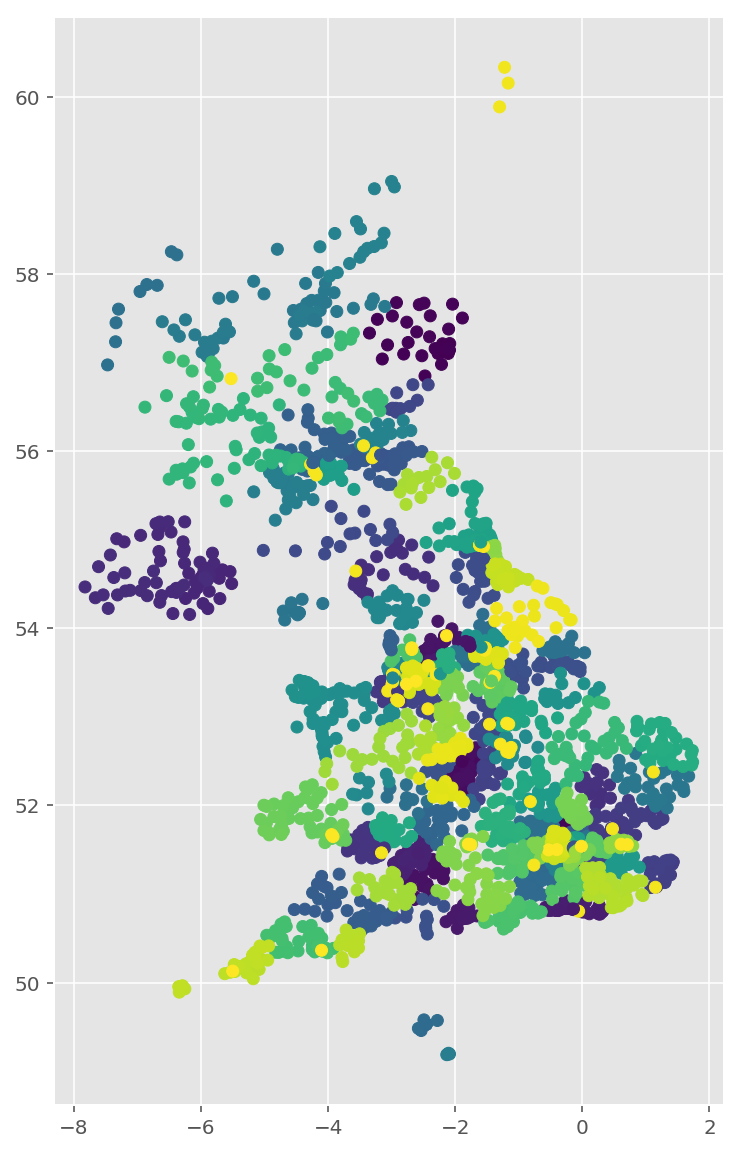

In [81]:
fig, ax = plt.subplots(figsize=(6,10))
plt.scatter(X.longitude,X.latitude,c=db.labels_);

## Bonus:

### Try k-means and hierarchical clustering on the given dataset. Which differences do you observe? Which algorithm do you find most suitable in each case?

In [47]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [52]:
X.head()

,id,postcode,latitude,longitude
0,2,AB10,57.13514,-2.11731
1,3,AB11,57.13875,-2.09089
2,4,AB12,57.10100,-2.11060
3,5,AB13,57.10801,-2.23776
4,6,AB14,57.10076,-2.27073


In [94]:
X = X[['latitude','longitude']]

kmeans = KMeans(n_clusters=14)
kmeans.fit(X)

#aggcluster = AgglomerativeClustering(n_clusters=100)
aggcluster = AgglomerativeClustering(n_clusters=None,distance_threshold=20)
clusters = aggcluster.fit(X)

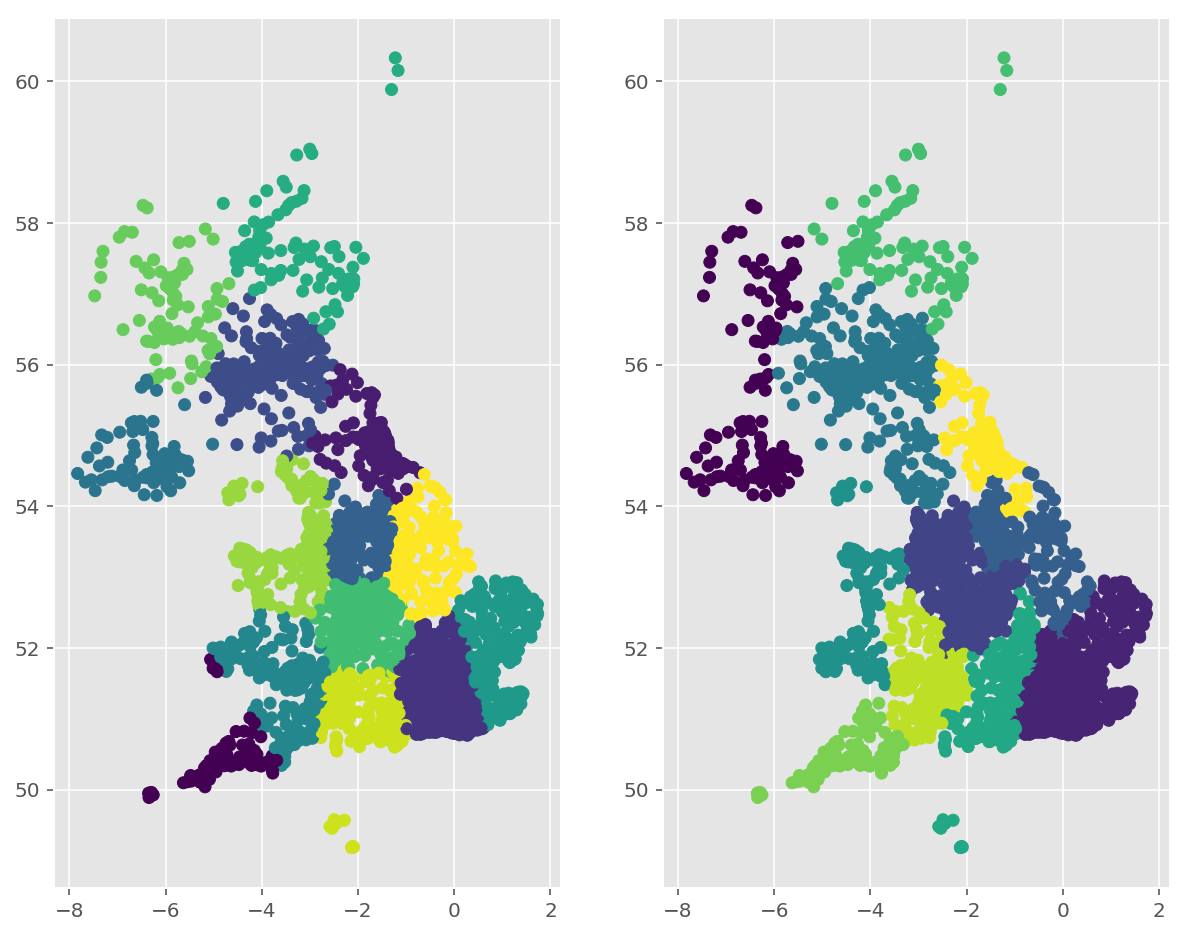

In [95]:
fig, ax = plt.subplots(ncols=2,figsize=(10,8))
ax[0].scatter(X['longitude'],X['latitude'],c=kmeans.labels_);
ax[1].scatter(X['longitude'],X['latitude'],c=aggcluster.labels_);

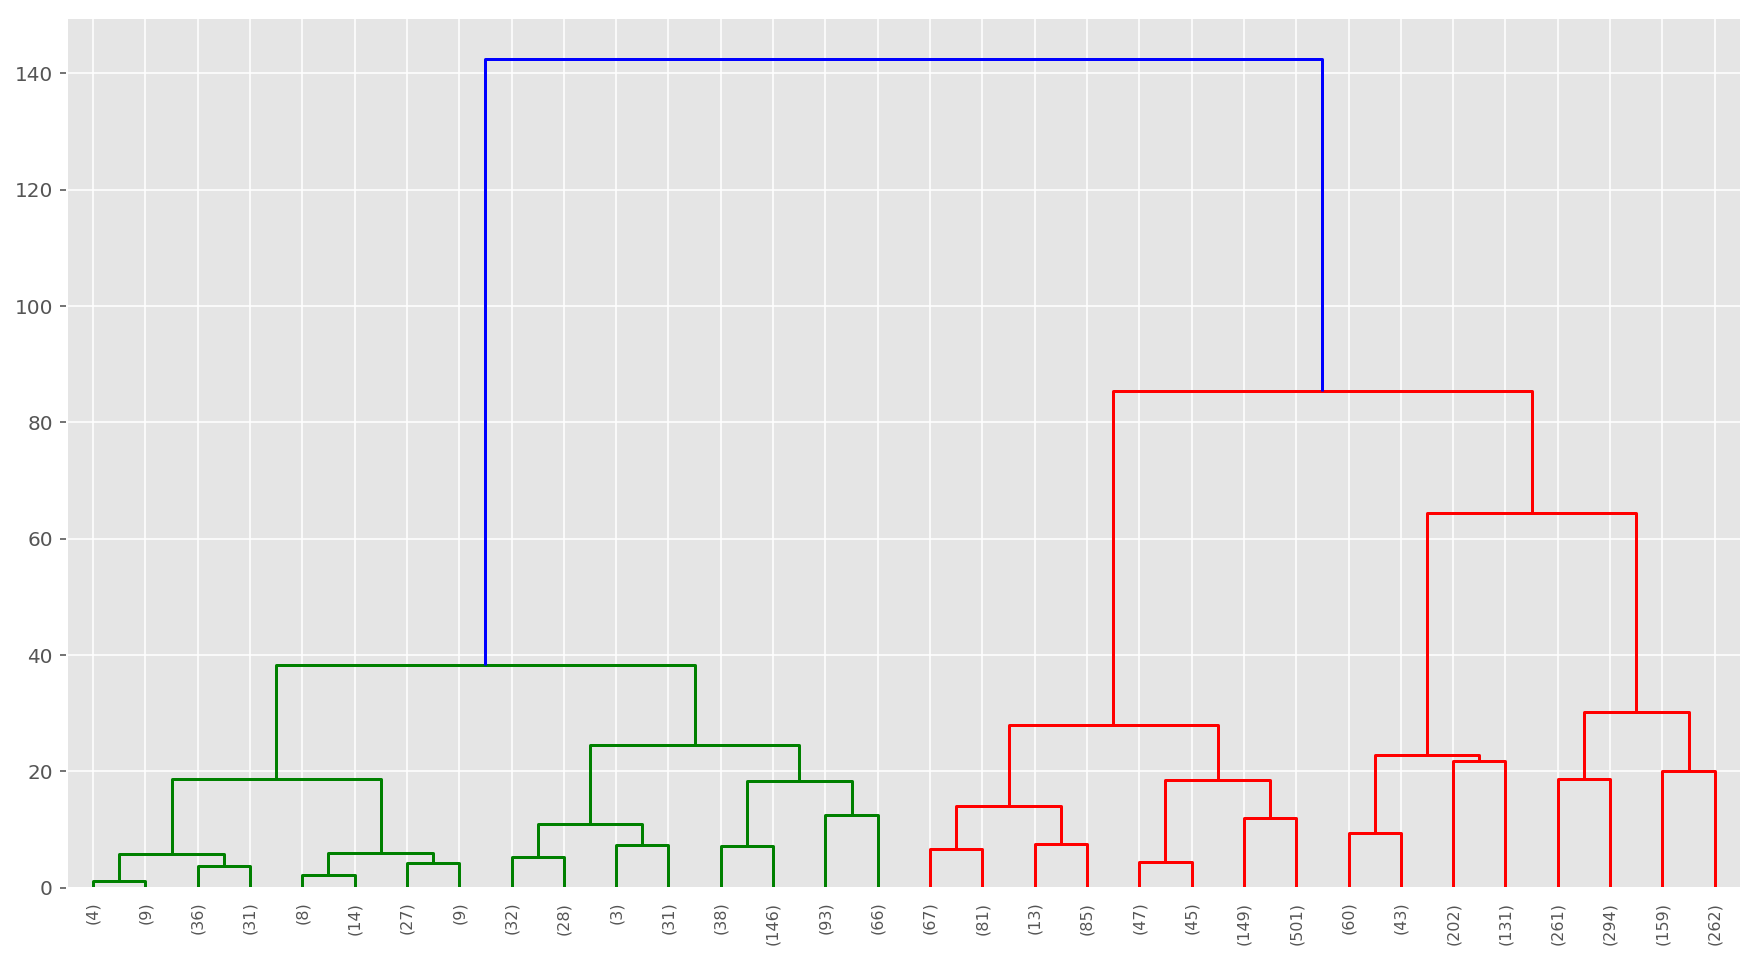

In [97]:
plt.figure(figsize=(15, 8))
dendrogram(
    linkage(X, method='ward', metric='euclidean'),
    truncate_mode='level',
    p=4,
    orientation='top',
    leaf_rotation=90. 
#     leaf_font_size=8.
#     color_threshold=10
)
plt.show()